Download GloVe here: [https://umkc.box.com/s/hya5wfidhgnf9nkq9wermn8otv78spxl](https://umkc.box.com/s/hya5wfidhgnf9nkq9wermn8otv78spxl)

Download [Spam Dataset](https://umkc.box.com/s/hy97prsom32j0p1ofpfgmopjd1zltx39)

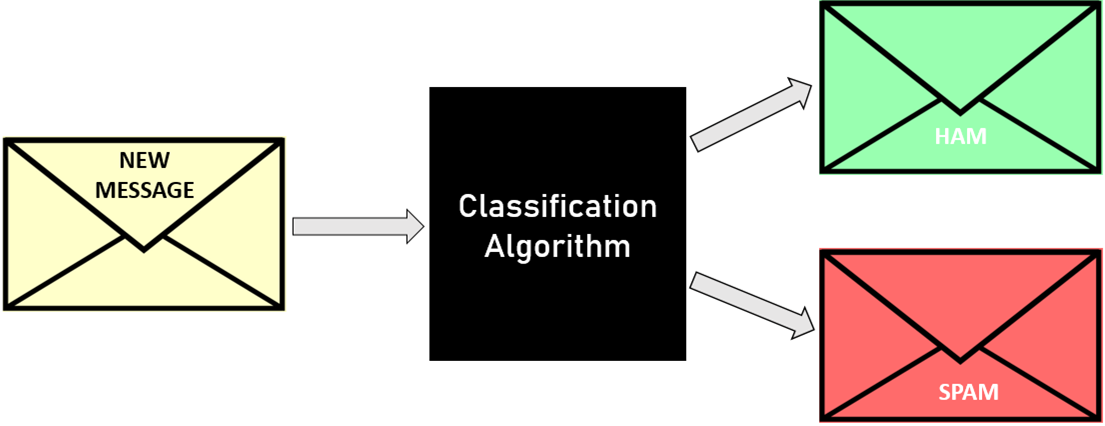

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-plot
# !pip install --upgrade gensim #word2vec - remember to restart the runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns 
import scikitplot as skplt #
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #



#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
#print(os.listdir("../input"))

# Read Data 

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding = 'latin-1')

# Show Data

In [ ]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Splitting the labels and the data separately

In [ ]:
df_labels = df['Label']
df_labels.head(11)

0      ham
1      ham
2     spam
3      ham
4      ham
5     spam
6      ham
7      ham
8     spam
9     spam
10     ham
Name: Label, dtype: object

# Data Visualization
 - To check the most used word in Ham sms and Spam SMS
 - To visualize the percentage of Ham and Spam SMS



				 HAM WORDS


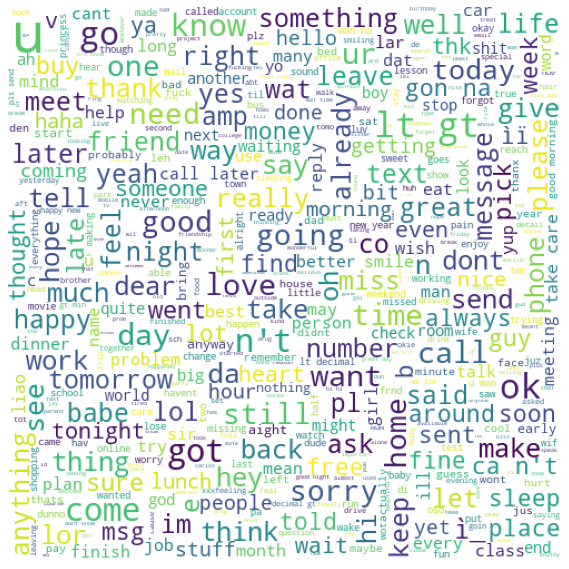

				 SPAM WORDS


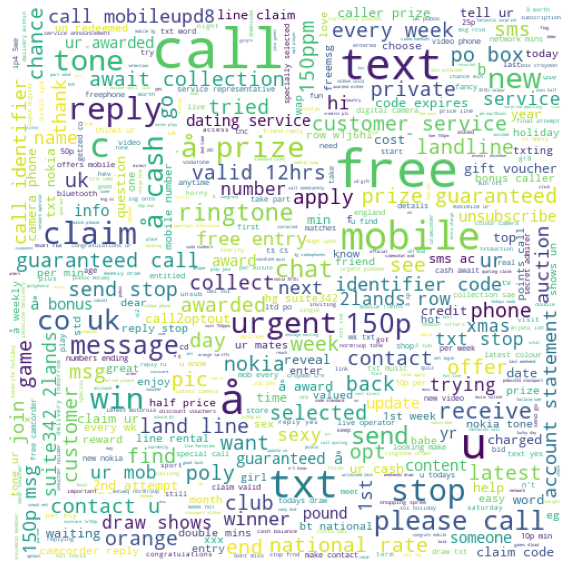

In [ ]:
stopwords = list(STOPWORDS)
STOPWORDS_NLTK = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS_NLTK

ham_dataset = df[df.Label == 'ham']
spam_dataset = df[df.Label == 'spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

## Plotting ham and spam data % in pie chart

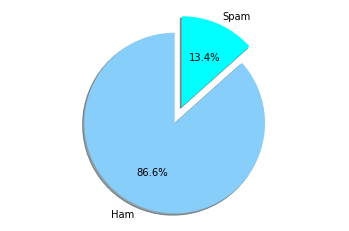

In [ ]:
count_Class = pd.value_counts(df.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

# Splitting the Test and Train Data 

In [ ]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.20, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(4457, 2)
(1115, 2)

The Trainset consists of 4457 records and 2 features

The Testset consists of 1115 records and 2 features


# Extracting N-grams from the Text Data

In [ ]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

In [ ]:
vocab_size = len(countvect.vocabulary_)
vocab = countvect.vocabulary_
print(vocab)

{'no in': 19996, 'in the': 14437, 'the same': 28496, 'same boat': 24616, 'boat still': 4514, 'still here': 26834, 'here at': 13063, 'at my': 3319, 'my moms': 19322, 'moms check': 18626, 'check me': 6085, 'me out': 17931, 'out on': 22174, 'on yo': 21460, 'yo half': 34248, 'half naked': 12272, 'bank of': 3748, 'of granite': 20802, 'granite issues': 11813, 'issues strong': 14999, 'strong buy': 27006, 'buy explosive': 5099, 'explosive pick': 9343, 'pick for': 22713, 'for our': 10132, 'our members': 22088, 'members up': 18171, 'up over': 31066, 'over 300': 22230, '300 nasdaq': 607, 'nasdaq symbol': 19499, 'symbol cdgt': 27319, 'cdgt that': 5924, 'that is': 27935, 'is 00': 14681, '00 per': 1, 'they giving': 28910, 'giving second': 11247, 'second chance': 24911, 'chance to': 5972, 'to rahul': 29949, 'rahul dengra': 23641, 'played smash': 22880, 'smash bros': 25887, 'bros lt': 4787, 'lt gt': 17296, 'gt religiously': 12001, 'private your': 23338, 'your 2003': 34706, '2003 account': 468, 'accoun

# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest

# Naive Bayes classifier 

The accuracy of Naive Bayes clasifier is 97.9372197309417%

 [[960   5]
 [ 18 132]]


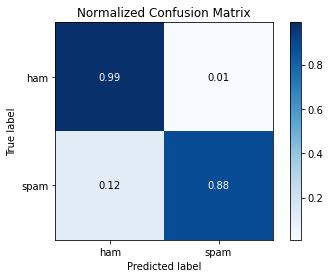

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

In [ ]:
print('Multinominal NB Report: \n', classification_report(test_set.Label, predicted_values_NB))

Multinominal NB Report: 
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Logistic Regression

The accuracy of Logistics Regression clasifier is 95.33632286995515%

 [[964   1]
 [ 51  99]]


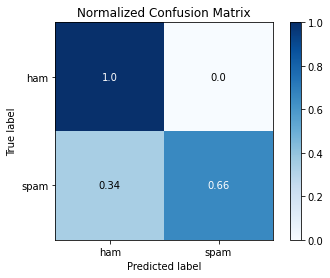

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Logistic Regression'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Logistics Regression clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

In [ ]:
print('Logistic Regression Report: \n', classification_report(test_set.Label, predicted_values_NB))

Logistic Regression Report: 
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.99      0.66      0.79       150

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



# Assignment: 
- Utilize another vectorizer of your choice (TF-IDF Word-Level/N-Gram, hash, Count (word-level))
- Use 2 more classifiers

  Hints:

  1.   K-Nearest Neighbors `KNeighborsClassifier()`
  2.   Decision Tree `DecisionTreeClassifier()`
  3. Support Vector Machine `svm.SVC()`
  4. Random Forest `RandomForestClassifier()`



# TF-IDF Word-Level

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words = 'english', max_features=5000)
tfidf_vect.fit(train_set.Message)

xtrain_tfidf =  tfidf_vect.transform(train_set.Message)
xtest_tfidf =  tfidf_vect.transform(test_set.Message)

In [ ]:
vocab_size = len(countvect.vocabulary_)
vocab = countvect.vocabulary_
print(vocab)

{'no in': 19996, 'in the': 14437, 'the same': 28496, 'same boat': 24616, 'boat still': 4514, 'still here': 26834, 'here at': 13063, 'at my': 3319, 'my moms': 19322, 'moms check': 18626, 'check me': 6085, 'me out': 17931, 'out on': 22174, 'on yo': 21460, 'yo half': 34248, 'half naked': 12272, 'bank of': 3748, 'of granite': 20802, 'granite issues': 11813, 'issues strong': 14999, 'strong buy': 27006, 'buy explosive': 5099, 'explosive pick': 9343, 'pick for': 22713, 'for our': 10132, 'our members': 22088, 'members up': 18171, 'up over': 31066, 'over 300': 22230, '300 nasdaq': 607, 'nasdaq symbol': 19499, 'symbol cdgt': 27319, 'cdgt that': 5924, 'that is': 27935, 'is 00': 14681, '00 per': 1, 'they giving': 28910, 'giving second': 11247, 'second chance': 24911, 'chance to': 5972, 'to rahul': 29949, 'rahul dengra': 23641, 'played smash': 22880, 'smash bros': 25887, 'bros lt': 4787, 'lt gt': 17296, 'gt religiously': 12001, 'private your': 23338, 'your 2003': 34706, '2003 account': 468, 'accoun

In [ ]:
#reduce data dimension using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(tfidf_vect.transform(train_set.Message).toarray())
data2D = pca.transform(tfidf_vect.transform(train_set.Message).toarray())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


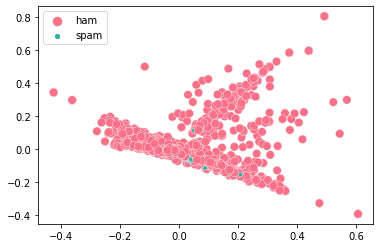

In [ ]:
# plot the features
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=train_set.Label.tolist(),size=train_set.Label.tolist(),palette="husl")

# KNN

# KNN with GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
#param_grid = {'n_neighbors': [k_range],
             # 'weights' : ['uniform', 'distance'],
             # 'metric': ['euclidean','manhattan']}
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(xtrain_tfidf, train_label)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 94.84%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(xtrain_tfidf, train_label)

pred=knn.predict(xtest_tfidf) 
print('KNN Report: \n', classification_report(test_set.Label, pred))

KNN Report: 
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.67      0.80       150

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



# Checking accuracy for the test data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(xtrain_tfidf, train_label)

pred=knn.predict(xtest_tfidf) 

test_accuracy=accuracy_score(test_label,pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 95.52%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


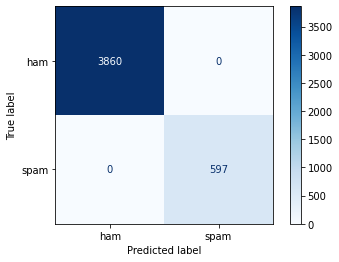

In [ ]:
plot_confusion_matrix(grid,xtrain_tfidf, train_label, cmap=plt.cm.Blues, values_format='d' )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


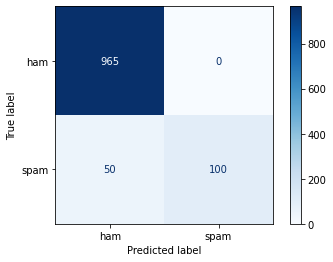

In [ ]:
plot_confusion_matrix(grid,xtest_tfidf, test_label, cmap=plt.cm.Blues, values_format='d' )

# Random Forest Classifier with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[10,20,30,40,50,60,70],
               'max_depth': [3,4,5,7],
               'criterion':['entropy'],
               'min_samples_split':[5,4,6,7,8],
               'max_features':['auto', 'sqrt', 'log2']
               }]
grid_search = GridSearchCV(estimator= RandomForestClassifier(n_estimators=20),
                           param_grid= parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = 10)

grid_search.fit(xtrain_tfidf, train_label)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.90 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 10}


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=7, max_features= 'sqrt', min_samples_split= 4, n_estimators= 10)

rfc.fit(xtrain_tfidf, train_label)

pred=rfc.predict(xtest_tfidf) 

print('Random Forest Report: \n', classification_report(test_set.Label, pred))

Random Forest Report: 
               precision    recall  f1-score   support

         ham       0.89      1.00      0.94       965
        spam       1.00      0.17      0.30       150

    accuracy                           0.89      1115
   macro avg       0.94      0.59      0.62      1115
weighted avg       0.90      0.89      0.85      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


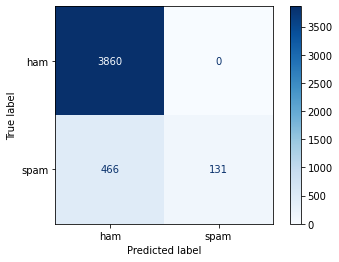

In [ ]:
plot_confusion_matrix(grid_search,xtrain_tfidf, train_label, cmap=plt.cm.Blues, values_format='d' )

# Checking the accuracy of test set

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=7, max_features= 'sqrt', min_samples_split= 4, n_estimators= 10)

rfc.fit(xtrain_tfidf, train_label)

pred=rfc.predict(xtest_tfidf) 

test_accuracy=accuracy_score(test_label,pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 89.42%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


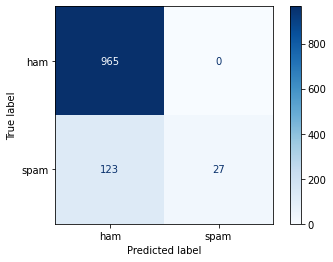

In [ ]:
plot_confusion_matrix(grid_search,xtest_tfidf, test_label, cmap=plt.cm.Blues, values_format='d' )

# Decision Tree with GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(xtrain_tfidf, train_label)
best_accuracy = grid_search_cv.best_score_
best_parameters = grid_search_cv.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Best Accuracy: 96.81 %
Best Parameters: {'max_leaf_nodes': 80, 'min_samples_split': 2}


In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes= 80, min_samples_split= 2)

dt.fit(xtrain_tfidf, train_label)

pred=dt.predict(xtest_tfidf) 

print('Decision Tree Report: \n', classification_report(test_set.Label, pred))

Decision Tree Report: 
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       965
        spam       0.89      0.87      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


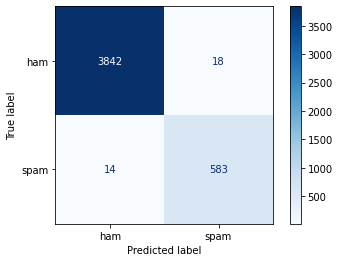

In [ ]:
plot_confusion_matrix(grid_search_cv,xtrain_tfidf, train_label, cmap=plt.cm.Blues, values_format='d' )

# Checking the accuracy of test set

In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes= 80, min_samples_split= 2)

dt.fit(xtrain_tfidf, train_label)

pred=dt.predict(xtest_tfidf) 

test_accuracy=accuracy_score(test_label,pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 97.13%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


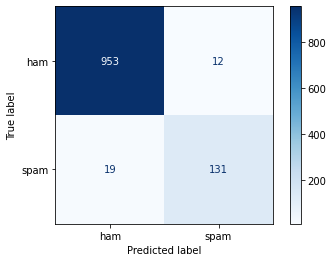

In [ ]:
plot_confusion_matrix(grid_search_cv,xtest_tfidf, test_label, cmap=plt.cm.Blues, values_format='d' )

# SVC with GridSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(xtrain_tfidf, train_label)

best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.930 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.930 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.865 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [ ]:
svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')

svc.fit(xtrain_tfidf, train_label)

pred=svc.predict(xtest_tfidf) 

print('SVC Report: \n', classification_report(test_set.Label, pred))

SVC Report: 
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.99      0.91      0.94       150

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


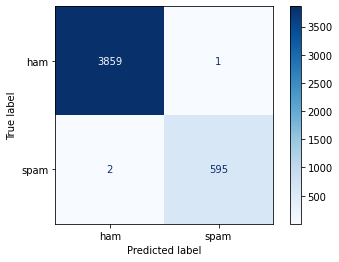

In [ ]:
plot_confusion_matrix(grid,xtrain_tfidf, train_label, cmap=plt.cm.Blues, values_format='d' )

# Checking the accuracy of test set

In [ ]:
svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')

svc.fit(xtrain_tfidf, train_label)

pred=svc.predict(xtest_tfidf)

test_accuracy=accuracy_score(test_label,pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 98.57%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


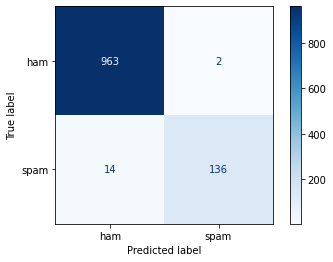

In [ ]:
plot_confusion_matrix(grid,xtest_tfidf, test_label, cmap=plt.cm.Blues, values_format='d' )

# Accuracy Visualization

In [ ]:
# Import pandas library
import pandas as pd
  
# initialize list elements
data = [['Naive Bayes',97.93], ['Logistic Regression',95.33 ],['KNN',94.84],['Random Forest',89.9],['Decision Tree',96.81],['SVC',98.83]]
Algorithms = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC']
Accuracy_percentage = [97.93, 95.33, 94.84, 89.9, 96.81, 98.83]
  
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data , columns=['Algorithms', 'Accuracy Percentage'])
  
# print dataframe.
df

,Algorithms,Accuracy Percentage
0,Naive Bayes,97.93
1,Logistic Regression,95.33
2,KNN,94.84
3,Random Forest,89.90
4,Decision Tree,96.81
5,SVC,98.83


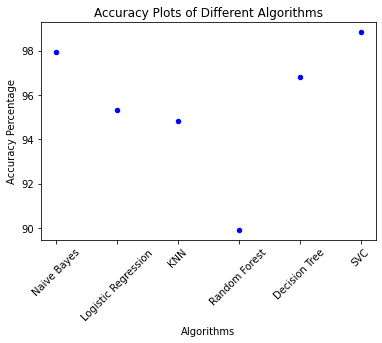

In [ ]:
#Get current axis
ax = plt.gca()
#plt.figure(figsize=(15,15))
df.plot(kind = 'scatter',x = 'Algorithms',
        y = 'Accuracy Percentage',
        color = 'blue',ax = ax)
  
# set the title
plt.title('Accuracy Plots of Different Algorithms')
plt.xticks(rotation=45)  
#plt.figure(figsize=(15,15))
plt.xticks(rotation=45)  
# show the plot
plt.show()

# Method Comparison

,Algorithms,Percentage
0,Naive Bayes,97.93722


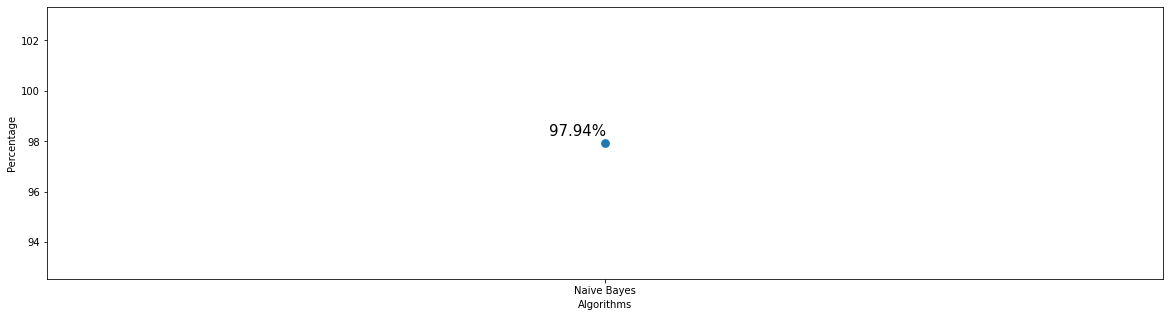

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (20,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
new_ax = sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);
all_x_values = [path.get_offsets()[:, 0] for path in new_ax.collections]
all_y_values = [path.get_offsets()[:, 1] for path in new_ax.collections]
# ax1.scatter(x=all_x_values, y=all_y_values, s=200, fc='none', ec='r')
for x,y in zip(all_x_values[0].tolist(), all_y_values[0].tolist()):
  # print(x,y)
  ax1.text(x-0.05, y+0.3, "{}%".format(round(y,2)), fontsize = 15)

If you implemented some extra approaches, you will get a more diverse plot. Create your own version!

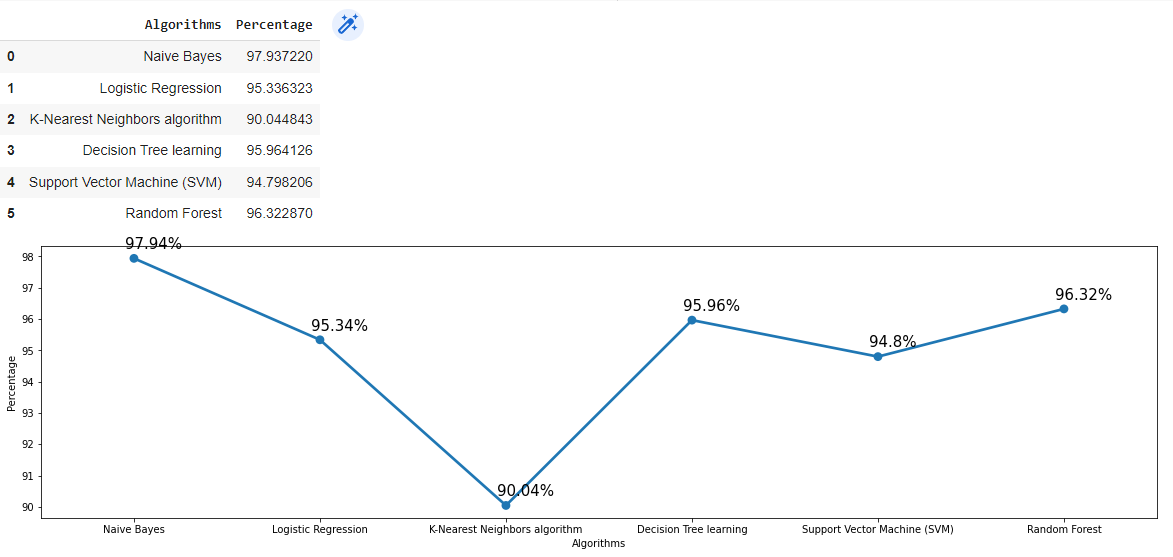